In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [15,10]  #(6,4)default

In [13]:
im = cv2.imread('images/landscape.jpg')

In [14]:
(h,w,c) = im.shape
(h,w,c)

(1200, 1920, 3)

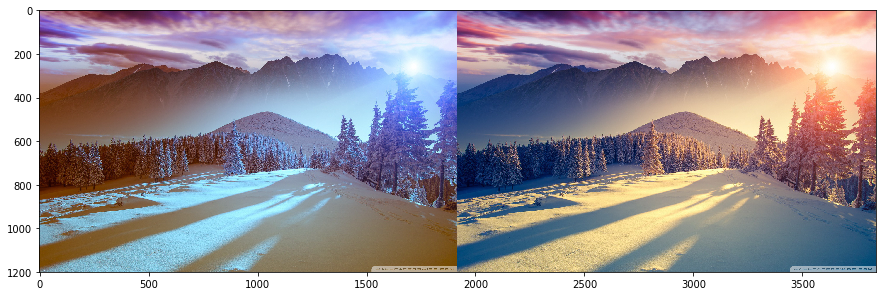

In [15]:
image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([im,image]))
plt.show()

In [16]:
from sklearn.cluster import MiniBatchKMeans

In [18]:
flatImg = image.reshape(h*w,3)

clt = MiniBatchKMeans(n_clusters=16)
labels = clt.fit_predict(flatImg)

In [19]:
labels.shape   #list of which center assigned to each pixel

(2304000,)

In [20]:
clt.clt.cluster_centers_

array([[236.2781441 , 192.83750695, 146.60488979],
       [ 56.60081208,  85.19203112, 121.46443294],
       [129.9467572 ,  83.04699134,  91.4392414 ],
       [175.69402558, 148.32406926, 175.84042221],
       [246.23125323, 227.72878239, 212.43233925],
       [213.0497072 , 180.5411957 , 188.32806755],
       [ 13.9268981 ,  27.30915822,  69.4177945 ],
       [ 92.42198849, 107.41201086, 129.60140994],
       [168.84666474, 146.61105484, 133.73500217],
       [249.3349401 , 219.2918957 , 164.74122622],
       [ 26.83903168,  59.34916847, 106.77533288],
       [ 78.27941093,  56.84890966,  80.79612008],
       [202.36302979, 174.07013241, 136.54850444],
       [130.76105767, 124.94130262, 136.75221897],
       [228.53826027, 134.51358532, 119.08686552],
       [178.2780593 , 103.72107817,  96.67349506]])

In [22]:
quant = clt.cluster_centers_.astype('uint8')[labels]
quant.shape


(2304000, 3)

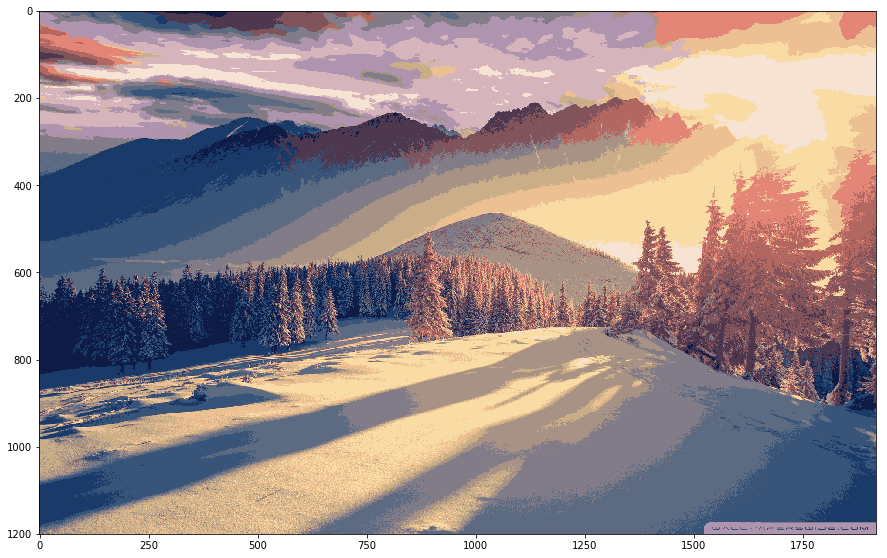

In [23]:
quant = quant.reshape((h, w, 3))
plt.imshow(quant)
plt.show()

In [24]:
quant = cv2.cvtColor(quant,cv2.COLOR_RGB2BGR)
cv2.imwrite("output/compressed.jpg",quant)

True